# Setup

In [ ]:
# Import necessary libraries
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Get MNIST Dataset

In [ ]:
# Load MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

# Convert target to integers (it may come as string)
y = y.astype(np.uint8)

In [ ]:
y.shape

(70000,)

In [ ]:
X.shape

(70000, 784)

# Split Data

In [ ]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 10000, random_state=42)
# I will train with 30000 images instead of 6000.
X_train1, y_train1 = X[:30000], y[:30000]

# Tuning SVM Classifier Hyperparameters using Grid Search with Cross-Validation:

# Linear Kernel

In [ ]:
# Tuning SVM Classifier Hyperparameters using Grid Search with Cross-Validation
param_grid = {

    'kernel': ['linear'],
    'C': [0.001, 0.01, 1]
}

# Initialize the SVM classifier
svm_clf = SVC()

# Set up Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, ve3rbose=3)

grid_search.fit(X_train1, y_train1)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters: {'C': 0.01, 'kernel': 'linear'}
Best Cross-Validation Score: 0.9084


##SVC_Linear on Test Set

In [ ]:
best_svm_linear = SVC(C=0.01, kernel='linear')
# Measure training time
start_time = time.time()
best_svm_linear.fit(X_train, y_train)
training_time = time.time() - start_time

# Now you can predict
y_pred = best_svm_linear.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))

# Get precision, recall, and F1 score for all classes combined (using macro, micro, or weighted)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Training Time: {:.2f} seconds".format(training_time))

In [ ]:
best_svm_linear = SVC(C=0.01, kernel='linear')
# Measure training time
start_time = time.time()
best_svm_linear.fit(X_train, y_train)
training_time = time.time() - start_time

# Now you can predict
y_pred = best_svm_linear.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))

# Get precision, recall, and F1 score for all classes combined (using macro, micro, or weighted)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Training Time: {:.2f} seconds".format(training_time))


Test Accuracy: 0.9195
Precision: 0.9200
Recall: 0.9195
F1-Score: 0.9194
Training Time: 10614.18 seconds


## Polynomial Kernel

In [ ]:
# Define parameter grid for polynomial kernel SVC
param_grid = {
    'C': [10, 100],
    'degree': [3, 4],
    'coef0': [0, 1],
    'kernel': ['poly']  # Specify poly kernel
}

# Initialize the SVC model
svc_poly = SVC()

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(svc_poly, param_grid, cv=3, verbose=3)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END C=10, coef0=0, degree=3, kernel=poly;, score=0.977 total time= 2.5min
[CV 2/3] END C=10, coef0=0, degree=3, kernel=poly;, score=0.977 total time= 2.5min
[CV 3/3] END C=10, coef0=0, degree=3, kernel=poly;, score=0.974 total time= 2.5min
[CV 1/3] END C=10, coef0=0, degree=4, kernel=poly;, score=0.971 total time= 2.8min
[CV 2/3] END C=10, coef0=0, degree=4, kernel=poly;, score=0.972 total time= 2.8min
[CV 3/3] END C=10, coef0=0, degree=4, kernel=poly;, score=0.969 total time= 2.8min
[CV 1/3] END C=10, coef0=1, degree=3, kernel=poly;, score=0.978 total time= 2.5min
[CV 2/3] END C=10, coef0=1, degree=3, kernel=poly;, score=0.979 total time= 2.5min
[CV 3/3] END C=10, coef0=1, degree=3, kernel=poly;, score=0.976 total time= 2.5min
[CV 1/3] END C=10, coef0=1, degree=4, kernel=poly;, score=0.978 total time= 2.5min
[CV 2/3] END C=10, coef0=1, degree=4, kernel=poly;, score=0.979 total time= 2.5min
[CV 3/3] END C=10, coef0=1,

## SVC Polynomial on Test set

In [ ]:
# The best model
best_svm_poly = SVC(C=10, coef0=1, degree=4, kernel='poly')

# Measure training time
start_time = time.time()
best_svm_poly.fit(X_train, y_train)
training_time = time.time() - start_time

# Evaluate on test data
y_pred = best_svm_poly.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))

# Get precision, recall, and F1 score for all classes combined
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Training Time: {:.2f} seconds".format(training_time))


Test Accuracy: 0.9783
Precision: 0.9783
Recall: 0.9783
F1-Score: 0.9783
Training Time: 163.48 seconds


# RBF Kernel (Best SVC)

In [ ]:
# Define the parameter grid
param_grid = {
    'kernel': ['rbf'],
    'C': [10, 100],
    'gamma': ['scale', 'auto', 0.01]
}

# Initialize the SVM classifier
svm_clf = SVC()

# Set up Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=3)

grid_search.fit(X_train1, y_train1)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.9754


## SVC_ RBF Evaluation on test data (The Best SVM)

In [ ]:
# The best model
best_svm_rbf = SVC(C=10, gamma='scale', kernel='rbf')

# Measure training time
start_time = time.time()
best_svm_rbf.fit(X_train, y_train)
training_time_rbf = time.time() - start_time

# Evaluate on test data
y_pred = best_svm_rbf.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))

# Get precision, recall, and F1 score for all classes combined (using macro, micro, or weighted)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Training Time: {:.2f} seconds".format(training_time_rbf))



Test Accuracy: 0.9815
Precision: 0.9815
Precision: 0.9815
Recall: 0.9815
F1-Score: 0.9815
Training Time: 320.93 seconds


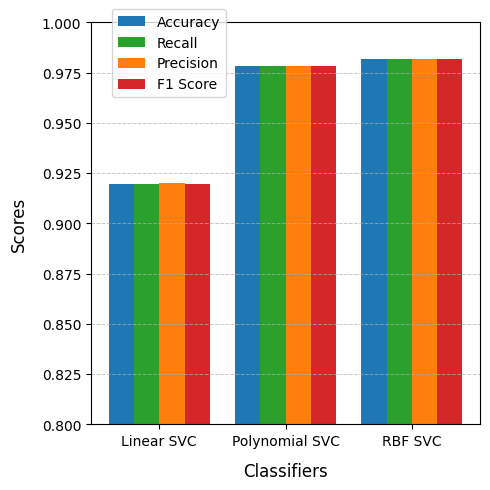

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the three classifiers
classifiers = ['Linear SVC', 'Polynomial SVC', 'RBF SVC']
accuracy = [0.9195, 0.9783, 0.9815]  # Accuracy values
recall = [0.9195, 0.9783, 0.9815]  # Recall values
precision = [0.9200, 0.9783, 0.9815]  # Precision values
f1_score = [0.9194, 0.9783, 0.9815]  # F1-Score values

# Bar chart setup
bar_width = 0.2
index = np.arange(len(classifiers))

# Create the figure and a single subplot
plt.figure(figsize=(5, 5))

# Plot Accuracy
plt.bar(index, accuracy, bar_width, label='Accuracy', color='#1f77b4')

# Plot Recall
plt.bar(index + bar_width, recall, bar_width, label='Recall', color='#2ca02c')

# Plot Precision
plt.bar(index + 2 * bar_width, precision, bar_width, label='Precision', color='#ff7f0e')

# Plot F1-Score
plt.bar(index + 3 * bar_width, f1_score, bar_width, label='F1 Score', color='#d62728')

# Set the y-axis limit to display only the range from 0.8 to 1.0
plt.ylim(0.8, 1.0)

# Adding labels and title
plt.xlabel('Classifiers', fontsize=12, labelpad=10)
plt.ylabel('Scores', fontsize=12, labelpad=10)
plt.title('')
# plt.title('Performance Metrics for SVC Classifiers', fontsize=16, pad=20)

# Set x-ticks to classifiers
plt.xticks(index + 1.5 * bar_width, classifiers)

# Add a grid
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Add a legend above the Linear SVC bar
plt.legend(loc='upper center', bbox_to_anchor=(0.2, 1.05), fontsize=10)

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=10)

# Adjust layout to fit everything
plt.tight_layout()

# Show the chart
plt.show()


# KNN Classifier Hyperparameters Fine-Tuning

In [ ]:
# Perform a grid search to find the best hyperparameters
param_grid = {
    'n_neighbors': [3, 4, 5],
    'weights': ['uniform', 'distance']
}

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

print("\n Best parameters found by grid search:", grid_search.best_params_)
print("\n Best cross-validation accuracy:", grid_search.best_score_)

print('\n Best knn_clf =', grid_search.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  39.1s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  38.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  39.2s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  39.3s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  39.8s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.973 total time=  38.2s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  38.8s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.973 total time=  37.2s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  38.9s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  39.1s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  40.8s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

In [ ]:
# The best model
Best_knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
# Measure training time
start_time = time.time()
Best_knn_clf.fit(X_train, y_train)
training_time = time.time() - start_time
print("Training Time: {:.2f} seconds".format(training_time))

Training Time: 0.01 seconds


 # KNN Performance on the Test Set

In [ ]:
# The classifier with the best parameters
Best_knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')

# Measure training time
start_time = time.time()
Best_knn_clf.fit(X_train, y_train)
training_time = time.time() - start_time

# Evaluate on test data
y_pred = Best_knn_clf.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))

# Get precision, recall, and F1 score for all classes combined (using macro, micro, or weighted)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Training Time: {:.2f} seconds".format(training_time))



Test Accuracy: 0.9729
Precision: 0.9730
Precision: 0.9730
Recall: 0.9729
F1-Score: 0.9729
Training Time: 0.01 seconds


# Compare the accuracy of your KNN classifier with other classifiers

# Random Forest Classifier



In [ ]:
# Define the parameter grid for fine-tuning Random Forest hyperparameters
param_grid = {
    # Number of trees in the forest
    'n_estimators': [400, 500],
    # The number of features to consider when looking for the best split
    'max_depth': [30, None],  # Maximum depth of the trees
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("\n Best parameters found by grid search:", grid_search.best_params_)
print("\n Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits

 Best parameters found by grid search: {'max_depth': None, 'n_estimators': 500}

 Best cross-validation accuracy: 0.9695343635399791


## Random Forest Classifier on the Test Set

In [ ]:
# The classifier with the best parameters
best_RFC = RandomForestClassifier(max_depth=None, n_estimators= 500)

# Measure training time
start_time = time.time()
best_RFC.fit(X_train, y_train)
training_time = time.time() - start_time

# Evaluate on test data
y_pred = best_RFC.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))

# Get precision, recall, and F1 score for all classes combined (using macro, micro, or weighted)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Training Time: {:.2f} seconds".format(training_time))



Test Accuracy: 0.9689
Precision: 0.9690
Recall: 0.9689
F1-Score: 0.9689
Training Time: 352.47 seconds


Error Analysis


In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_test_pred))

,0,1,2,3,4,5,6,7,8,9
0,954,0,4,0,1,0,2,1,5,0
1,0,1114,4,5,1,0,0,3,2,0
2,1,2,925,2,4,0,4,4,7,1
3,1,0,17,968,0,6,2,8,8,8
4,1,0,2,0,857,0,5,2,2,16
5,1,1,0,15,3,878,6,0,8,2
6,5,1,0,0,3,7,929,0,1,0
7,1,3,13,0,5,0,0,1000,2,7
8,0,4,5,11,4,4,3,4,909,6
9,4,5,1,13,14,2,1,7,7,957


# SGD Classifier

In [ ]:
# Define the parameter grid for fine-tuning alpha and learning rate
param_grid = {

    'alpha': [1e-3, 1e-2], # Regularization strength
    'learning_rate': ['optimal', 'adaptive'], # Different learning rate strategies
    'eta0': [0.1]

  }

sgd_clf = SGDClassifier(random_state=42)
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from grid search
print("Best hyperparameters: ", grid_search.best_params_)
print("\n Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best hyperparameters:  {'alpha': 0.01, 'eta0': 0.1, 'learning_rate': 'optimal'}

 Best cross-validation accuracy: 0.8783698163692252


## SGD Classifier on the Test Set

In [ ]:
# The classifier with the best parameters
best_sgd_clf = SGDClassifier(alpha=0.01, learning_rate= 'optimal')

# Measure training time
start_time = time.time()
best_sgd_clf.fit(X_train, y_train)
training_time = time.time() - start_time

# Evaluate on test data
y_pred = best_sgd_clf.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))

# Get precision, recall, and F1 score for all classes combined (using macro, micro, or weighted)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Training Time: {:.2f} seconds".format(training_time))



Test Accuracy: 0.8783
Precision: 0.8876
Recall: 0.8783
F1-Score: 0.8788
Training Time: 177.71 seconds


Error Analysis


In [ ]:
pd.DataFrame(confusion_matrix(y_test, y_test_pred))

,0,1,2,3,4,5,6,7,8,9
0,900,0,6,0,3,9,16,2,26,5
1,0,1065,5,5,0,8,2,2,37,5
2,2,5,815,5,13,13,26,3,64,4
3,0,4,36,842,1,42,5,6,50,32
4,0,1,8,1,803,8,8,1,18,37
5,6,5,3,32,15,758,22,2,57,14
6,2,2,4,1,3,30,893,0,11,0
7,4,0,16,2,18,4,0,892,18,77
8,4,7,3,13,5,28,10,3,835,42
9,2,2,2,5,24,4,0,15,20,937


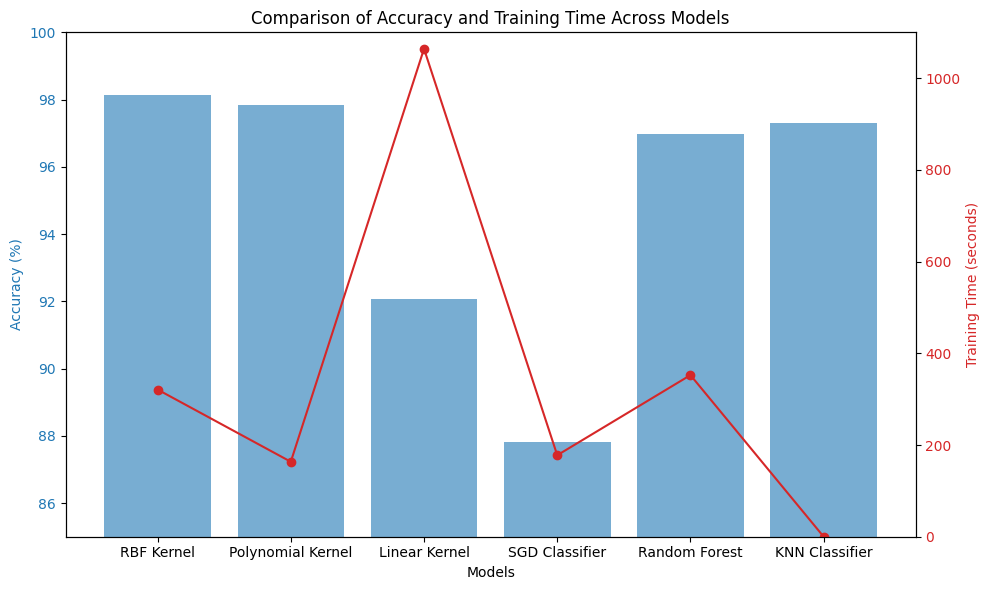

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for accuracy and training time
models = ['RBF Kernel', 'Polynomial Kernel', 'Linear Kernel', 'SGD Classifier', 'Random Forest', 'KNN Classifier']
accuracy = [98.15, 97.83, 92.08, 87.83, 96.98, 97.29]
training_time = [320.93, 163.48, 1064.10, 177.71, 352.47, 0.01]

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracy (left y-axis)
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy (%)', color='tab:blue')
ax1.bar(models, accuracy, color='tab:blue', alpha=0.6, label='Accuracy (%)')
ax1.set_ylim(85, 100)  # Set y-axis for accuracy to begin at 85
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for training time
ax2 = ax1.twinx()
ax2.set_ylabel('Training Time (seconds)', color='tab:red')
ax2.plot(models, training_time, color='tab:red', marker='o', label='Training Time (seconds)')
ax2.set_ylim(0, 1100)  # Set y-axis for training time
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and layout
plt.title('Comparison of Accuracy and Training Time Across Models')
fig.tight_layout()

# Show plot
plt.show()
